# Table of Contents
* [Fourier transform](#Fourier-transform)
* [From Fourier Series to Fourier transforms <a name="Towards_the_FT"></a>](#From-Fourier-Series-to-Fourier-transforms-<a-name="Towards_the_FT"></a>)
	* [Introduction and definitions](#Introduction-and-definitions)
	* [Examples](#Examples)
		* [The Fourier transform of a rectangular window](#The-Fourier-transform-of-a-rectangular-window)
		* [Fourier transform of a sine wave](#Fourier-transform-of-a-sine-wave)


In [1]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)


# From Fourier Series to Fourier transforms <a name="Towards_the_FT"></a>

In this section, we go from the Fourier series to the Fourier transform for discrete signal. 
So doing, we also introduce the notion of Discrete Fourier Transform that we will study in more details later. For now, we focus on the representations in the frequency domain, detail and experiment with some examples. 

## Introduction and definitions

Suppose that we only have an observation of length $N$. So no periodic signal, but a signal of size $N$. We do not know if there were data before the first sample, and we do not know if there were data after sample $N$. What to do? Facing to such situation, we can still 
- imagine that the data are periodic outside of the observation interval, with a period $N$. Then the formulas for the Fourier series **are** valid, for $n$ in the observation interval. Actually there is no problem with that. The resulting transformation is called the *Discrete Fourier Transform* \label{def:DFT}. The corresponding formulas are

$$
\eqboxc{\begin{aligned}
x(n) &= \sum_{k=0}^{N-1} X(k)  e^{j2\pi\frac{ k n}{N}}\\
\text{with   }
X(k) &= \frac{1}{N}\sum_{n=0}^{N-1} x(n)  e^{-j2\pi\frac{ k n}{N}}
\end{aligned}
}
\label{eq:DFT}
$$


- we may also consider that there is nothing --that is zeros, outside of the observation interval. In such condition, we can still imagine that we have a periodic signal, but with an infinite period. Since the separation of two harmonics in the Fourier series is $\Delta f$=1/period, we see that $\Delta f\rightarrow 0$. Then the Fourier representation becomes continuous. This is illustrated below.  

In [2]:
# compute the coeffs ck
def coeffck(x,L,k):
    assert np.size(x)==L, "input must be of length L"     
    karray=[]
    res=[]
    if isinstance(k,int):
       karray.append(k)
    else:
       karray=np.array(k)
   
    for k in karray:
        res.append(np.vdot(exp(1j*2*pi/L*k*np.arange(0,L)),x))
    return 1/L*np.array(res)

#test: coeffck(x[0:L],L,[-12,1,7])
# --> array([  1.51702135e-02 +4.60742555e-17j,
#     -1.31708229e-05 -1.31708229e-05j,   1.37224241e-05 -1.37224241e-05j])

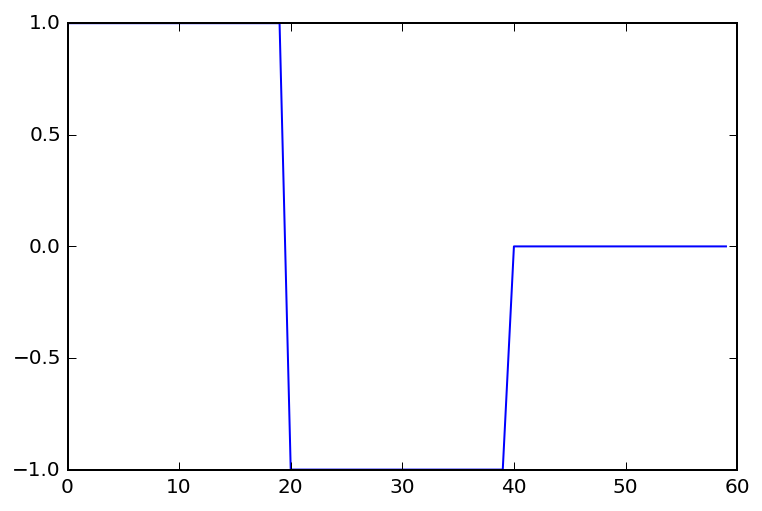

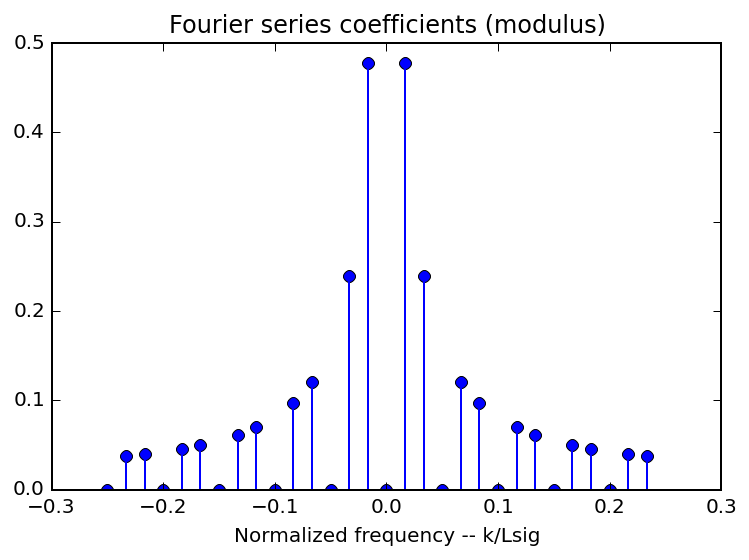

In [3]:
Lpad=20 # then 200, then 2000
# define a rectangular pulse
rect=np.concatenate((np.ones(20),-np.ones(20)))
# Add zeros after:
rect_zeropadded=np.concatenate((rect,np.zeros(Lpad)))
sig=rect_zeropadded
plt.plot(sig)
# compute the Fourier series for |k/Lsig|<1/4
Lsig=np.size(sig)
fmax=int(Lsig/4)
kk=np.arange(-fmax,fmax)
c=coeffck(sig[0:Lsig],Lsig,kk)
# plot it
plt.figure()
plt.stem(kk/Lsig,np.abs(c))
plt.title("Fourier series coefficients (modulus)")
plt.xlabel("Normalized frequency -- k/Lsig")

$\def\d{\mathrm{d}}$
Hence we obtain a formula where the discrete sum for reconstructing the time-series $x(n)$ becomes a continuous sum, since $f$ is now continuous:
$$
\begin{aligned}
x(n) = \sum_{k=0}^{N-1} c_k & e^{j2\pi\frac{ k n}{N}}   = \sum_{k/N=0}^{1-1/N} N X(k)  e^{j2\pi\frac{ k n}{N}} \frac{1}{N} \\ 
&\rightarrow x(n) = \int_{0}^{1} X(f)  e^{j2\pi f n} \d f 
\end{aligned}
$$
Finally, we end with what is called the **Discrete-time Fourier transform** \label{def:DiscreteTimeFT}:

$$
\boxed{\begin{aligned}
x(n) & = \int_{0}^{1} X(f)  e^{j2\pi f n} \d f \\
\text{with   }
X(f) &= \sum_{n=-\infty}^{\infty} x(n)  e^{-j2\pi f n}
\end{aligned}
}
\label{eq:DiscreteTimeFT}
$$


Even before exploring the numerous properties of the Fourier transform, 
it is important to stress that
<div class=alert-error style="text-align:center; width:60%; margin:auto; border:2px solid; border-color:#eed3d7">
The Fourier transform of a discrete signal is periodic with period one.
</div>

*Check it as an exercise!* Begin with the formula for $X(f)$ an compute $X(f+1)$. use the fact that $n$ is an integer and that $\exp(j2\pi n)=1$.

## Examples

\begin{exercise}.

- Compute the *Fourier transform* of a rectangular window given on $N$ points. The result is called a (discrete) cardinal sine (or sometimes Dirichlet kernel). Sketch a plot, and study the behaviour of this function with $N$. 
- Experiment numerically... See below the provided functions. 
- Compute the Fourier transform of a sine wave $\sin(2\pi f_0 n)$ given on $N$ points. 
- Examine what happens when the $N$ and $f_0$ vary. 
\end{exercise}

### The Fourier transform of a rectangular window

The derivation of the formula will be done in class. Let us see the experimental part. 

For the numerical experiments, import the fft (Fast Fourier Transform) function, 
```python
from numpy.fft import fft, ifft
```
define a sine wave, complute and plot its Fourier transform.  As the FFT is actually an implementation of a discrete Fourier transform, we will have an approximation of the true Fourier transform by using zero-padding (check that a parameter in the fft enables to do this zero-padding). 

In [4]:
from numpy.fft import fft, ifft

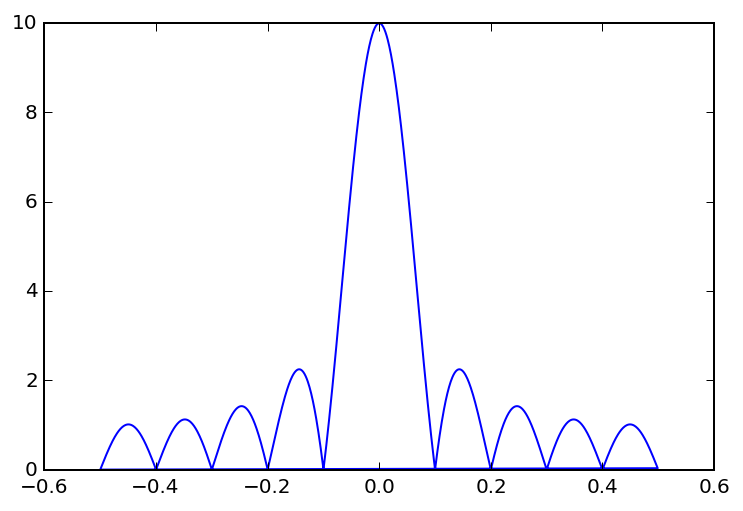

In [5]:
#Define a rectangular window, of length L
#on N points, zeropad to NN=1000
# take eg L=100, N=500
NN=1000
L=10 # 10, then 6, then 20, then 50, then 100...
r=np.ones(L)
Rf=fft(r,NN)
f=fftfreq(NN)
plt.plot(f,np.abs(Rf))

It remain to compare this to a discrete cardinal sinus. First we define a function and then compare the results.  

In [6]:
def dsinc(x,L):
    if isinstance(x,(int,float)): x=[x]
    x=np.array(x)
    out=np.ones(np.shape(x))
    I=np.where(x!=0)
    out[I]=np.sin(x[I])/(L*np.sin(x[I]/L))
    return out

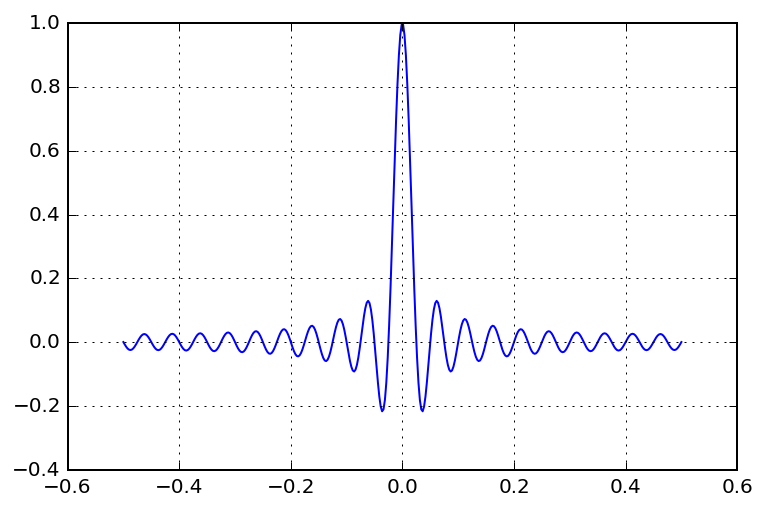

In [7]:
N=1000
L=40
f=np.linspace(-0.5,0.5,400)
plt.plot(f,dsinc(pi*L*f,L))
plt.grid(b='on')

Comparison of the Fourier transform of a rectangle and a cardinal sine: 

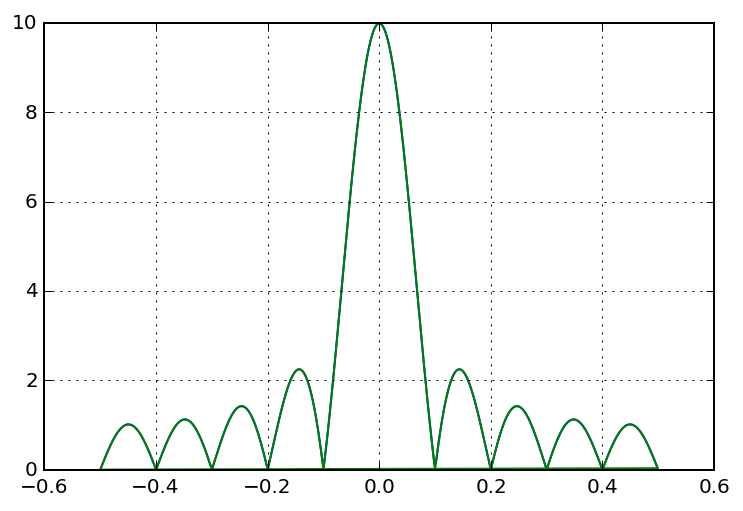

In [8]:
NN=1000
L=10 # 10, then 6, then 20, then 50, then 100...
r=np.ones(L)
Rf=fft(r,NN)

N=1000
f=np.linspace(-0.5,0.5,400)
plt.plot(f,L*np.abs(dsinc(pi*L*f,L)))
f=fftfreq(NN)
plt.plot(f,np.abs(Rf))
plt.grid(b='on')

Interactive versions...

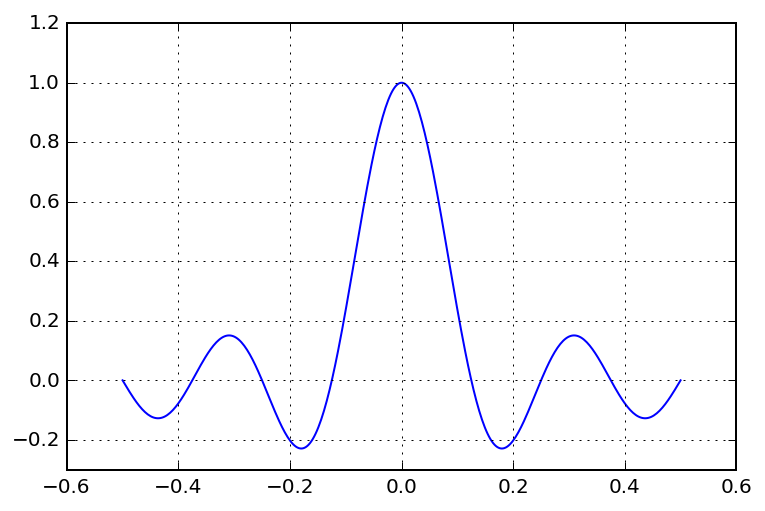

In [9]:
# using %matplotlib use a backend that allows external figures
# using %matplotlib inline plots the results in the notebook
%matplotlib inline
slider=widgets.FloatSlider(min=0.1,max=100,step=0.1,value=8)
display(slider)


#----- Callbacks des widgets -------------
def pltsinc(name,L):
        plt.clf()
        clear_output(wait=True)
        #val.value=str(f)
        f=np.linspace(-0.5,0.5,400)
        plt.plot(f,dsinc(pi*L*f,L))
        plt.ylim([-0.3, 1.2])
        plt.grid(b='on')
        
pltsinc('Width',8)
slider.on_trait_change(pltsinc,'value')


This is an example with matplotlib widgets interactivity, (instead of html widgets). The docs can be found at [http://nbviewer.ipython.org/github/jakevdp/matplotlib_pydata2013/blob/master/notebooks/03_Widgets.ipynb](http://nbviewer.ipython.org/github/jakevdp/matplotlib_pydata2013/blob/master/notebooks/03_Widgets.ipynb)

Using matplotlib backend: TkAgg


0

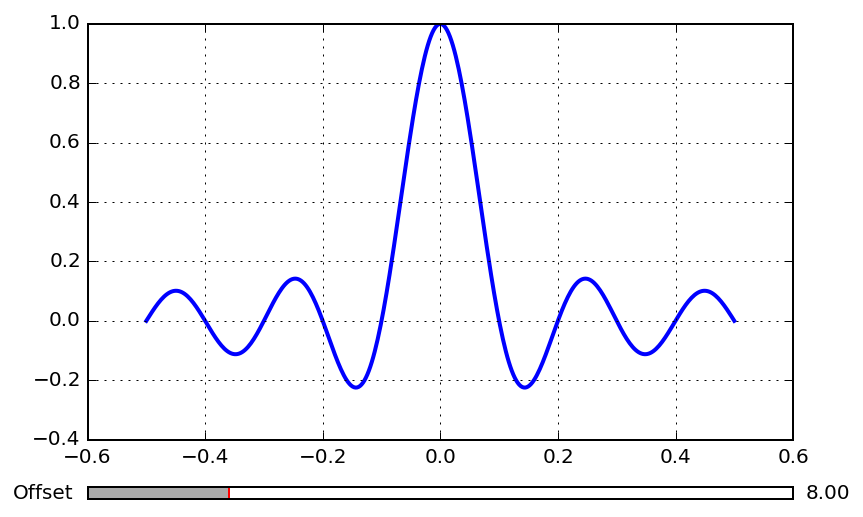

In [10]:
%matplotlib
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2, left=0.1)

slider_ax = plt.axes([0.1, 0.1, 0.8, 0.02])
slider = Slider(slider_ax, "Offset", 0, 40, valinit=8, color='#AAAAAA')
L=10
f=np.linspace(-0.5,0.5,400)

line, = ax.plot(f,dsinc(pi*L*f,L), lw=2)
#line2, = ax.plot(f,sinc(pi*L*f), lw=2)
#line2 is in order to compare with the "true" sinc
ax.grid(b='on')    

def on_change(L):
    line.set_ydata(dsinc(pi*L*f,L))
#    line2.set_ydata(sinc(pi*L*f))
        

slider.on_changed(on_change)

### Fourier transform of a sine wave

Again, the derivation will be done in class.

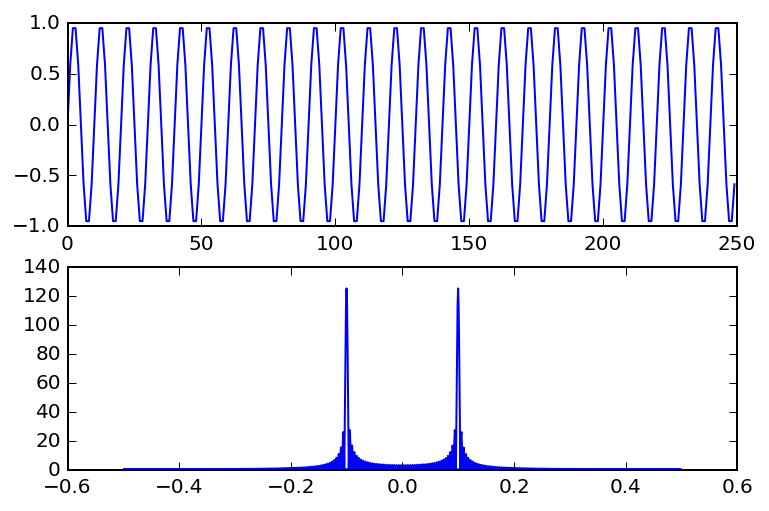

In [11]:
%matplotlib inline
from numpy.fft import fft, ifft
N=250; f0=0.1; NN=1000
fig,ax=plt.subplots(2,1)
def plot_sin_and_transform(N,f0,ax):
    t=np.arange(N)
    s=np.sin(2*pi*f0*t)
    Sf=fft(s,NN)
    ax[0].plot(t,s)
    f=np.fft.fftfreq(NN)
    ax[1].plot(f,np.abs(Sf))
plot_sin_and_transform(N,f0,ax)    

Interactive versions

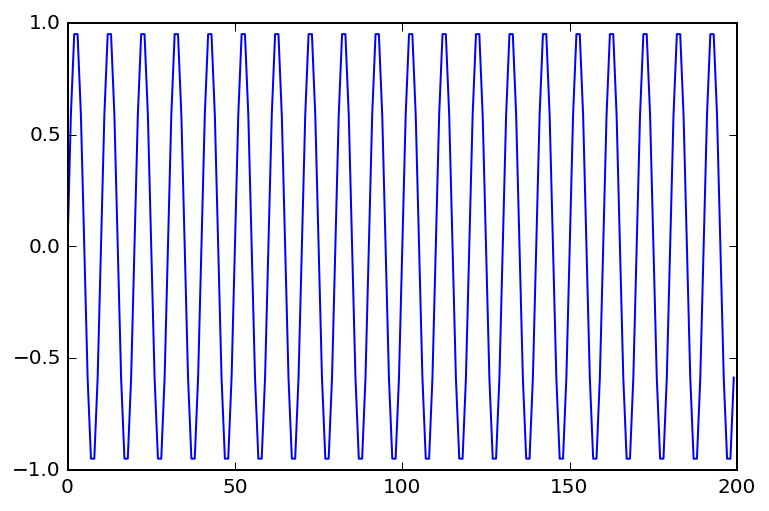

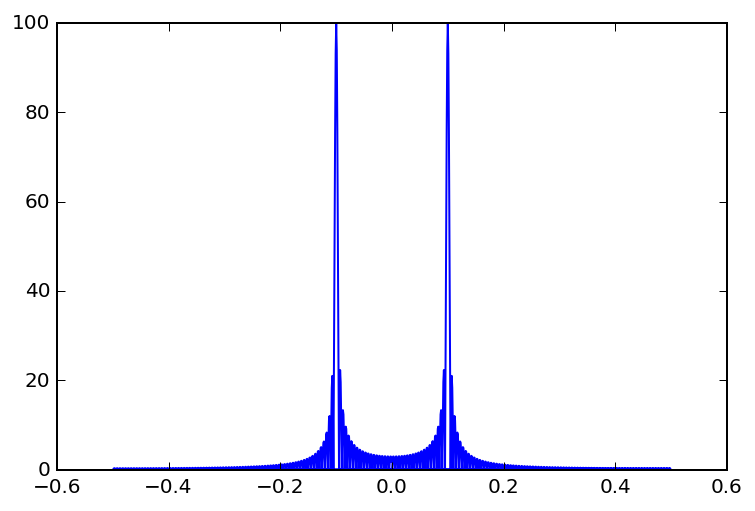

In [12]:
# using %matplotlib use a backend that allows external figures
# using %matplotlib inline plots the results in the notebook
%matplotlib inline
sliderN=widgets.IntSlider(min=1,max=1000,step=1,value=200)
sliderf0=widgets.FloatSlider(min=0,max=0.5,step=0.01,value=0.1)

display(sliderN)
display(sliderf0)
N=500; f0=0.1;
t=np.arange(N)
s=np.sin(2*pi*f0*t)
Sf=fft(s,NN)
f=np.fft.fftfreq(NN)


#----- Callbacks des widgets -------------
def pltsin(dummy):
        clear_output(wait=True)
        N=sliderN.value
        f0=sliderf0.value
        t=np.arange(N)
        s=np.sin(2*pi*f0*t)
        Sf=fft(s,NN)
        f=np.fft.fftfreq(NN)
        plt.figure(1)
        plt.clf()
        plt.plot(t,s)
        plt.figure(2)
        plt.clf()
        plt.plot(f,np.abs(Sf))
        
pltsin(8)
sliderN.on_trait_change(pltsin)
sliderf0.on_trait_change(pltsin)

0

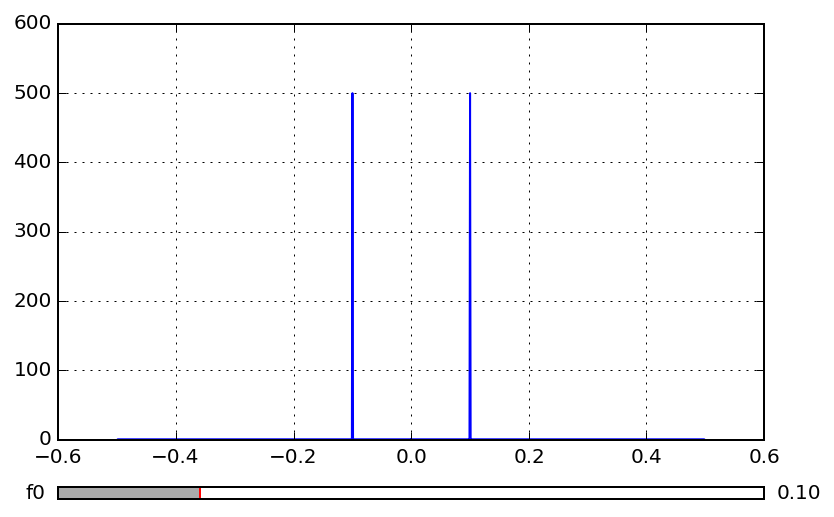

In [13]:
%matplotlib tk
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2, left=0.1)

slider_ax = plt.axes([0.1, 0.1, 0.8, 0.02])
slider = Slider(slider_ax, "f0", 0, 0.5, valinit=0.1, color='#AAAAAA')
f=np.linspace(-0.5,0.5,400)
N=1000
t=np.arange(N)
s=np.sin(2*pi*f0*t)
Sf=fft(s,NN)
f=np.fft.fftfreq(NN)
line, = ax.plot(f,np.abs(Sf))

ax.grid(b='on')    

def on_change(f0):
    s=np.sin(2*pi*f0*t)
    Sf=fft(s,NN)
    line.set_ydata(np.abs(Sf))
#    line2.set_ydata(sinc(pi*L*f))
        

slider.on_changed(on_change)


----
<div align=right> [Index](toc.ipynb) - [Back](Intro_Fourier.ipynb) - [Next](Discrete_Time_Fourier_properties.ipynb)</div>